<a href="https://colab.research.google.com/github/niveditha2000/MachineLearning_Group30/blob/main/Copy_of_Machine_Learning_model_(Group_30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import All the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd 
import random   
import PIL
import os
import time
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/Group_Project_Data/Train
6000


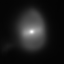

In [ ]:
train_data_dir = pathlib.Path('/content/drive/MyDrive/Group_Project_Data/Train')
valid_data_dir = pathlib.Path('/content/drive/MyDrive/Group_Project_Data/Valid')
print(train_data_dir)
image_count = len(list(train_data_dir.glob('*/*.png')))
print(image_count)
fake = list(train_data_dir.glob('Fake/*'))
PIL.Image.open(str(fake[0]))

In [ ]:
print('Loading data sets')
    
datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip=True, vertical_flip=True,
                                 dtype='float32')
train_generator = datagen.flow_from_directory(train_data_dir, target_size=(64,64),
                                                  class_mode='binary',
                                              color_mode='grayscale',
                                                  batch_size=256,
                                                  shuffle=True)
valid_generator = datagen.flow_from_directory(valid_data_dir, target_size=(64,64),
                                                  class_mode='binary',
                                              color_mode='grayscale',
                                                  batch_size=256,
                                                  shuffle=True)

Loading data sets
Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  label_mode='int',
  color_mode='grayscale',
  image_size=(64, 64))


Found 6000 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_data_dir,
  seed=123,
  label_mode='int',
  color_mode='grayscale',
  image_size=(64 , 64))

Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['Fake', 'Real']


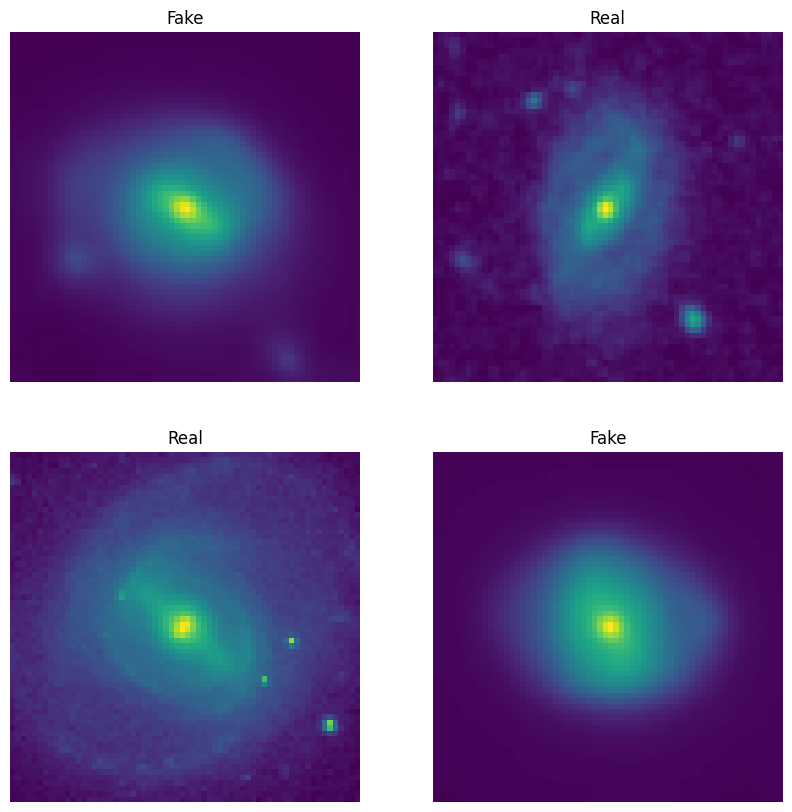

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("float32"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.savefig("fig 1.png")    


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 1)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Initialize the model
model = Sequential()

# Layer 1: Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 1),dtype='float32'))
model.add(Conv2D(16, (3, 3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# Layer 2: Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(32, (3, 3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# Layer 4: Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# Layer 6: Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
# Layer 7: Flatten layer to convert 2D features to 1D feature vector
model.add(Flatten())

# Layer 8: Fully connected layer with 256 units and ReLU activation
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.2))
# Layer 10: Output layer with the appropriate number of units for your task
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              #loss=tf.keras.losses.BinaryCrossentropy,
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

In [ ]:
history = Model10.fit(train_generator,validation_data=valid_generator,
  epochs=15,batch_size=256)

Epoch 1/15
24/24 [==============================] - 21s 637ms/step - loss: 3.2507 - accuracy: 0.5218 - val_loss: 1.8128 - val_accuracy: 0.5000
Epoch 2/15
24/24 [==============================] - 12s 506ms/step - loss: 1.2976 - accuracy: 0.5052 - val_loss: 0.9420 - val_accuracy: 0.5000
Epoch 3/15
24/24 [==============================] - 12s 490ms/step - loss: 0.8214 - accuracy: 0.5012 - val_loss: 0.7380 - val_accuracy: 0.5000
Epoch 4/15
24/24 [==============================] - 14s 577ms/step - loss: 0.7139 - accuracy: 0.4940 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 5/15
24/24 [==============================] - 12s 478ms/step - loss: 0.6956 - accuracy: 0.5050 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/15
24/24 [==============================] - 14s 576ms/step - loss: 0.6935 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
24/24 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4925

KeyboardInterrupt: ignored

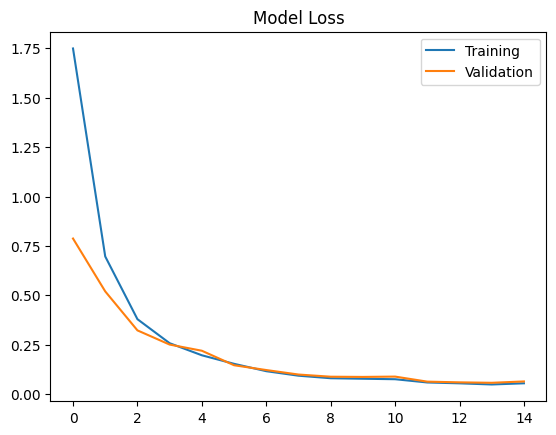

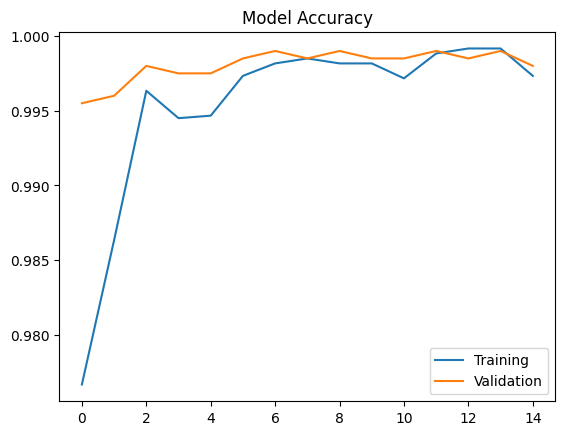

63/63 [==============================] - 1s 15ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')
plt.savefig('Fig 1')
plt.show()

y_pred = Model10.predict(val_ds)
y_pred_label = np.argmax(y_pred, axis=1)
print(y_pred_label[1:100])





In [ ]:
test_loss, test_acc = Model10.evaluate(val_ds)

63/63 [==============================] - 1s 9ms/step - loss: 0.0641 - accuracy: 0.9980


In [ ]:
pred = Model10.predict(val_ds)

63/63 [==============================] - 0s 6ms/step


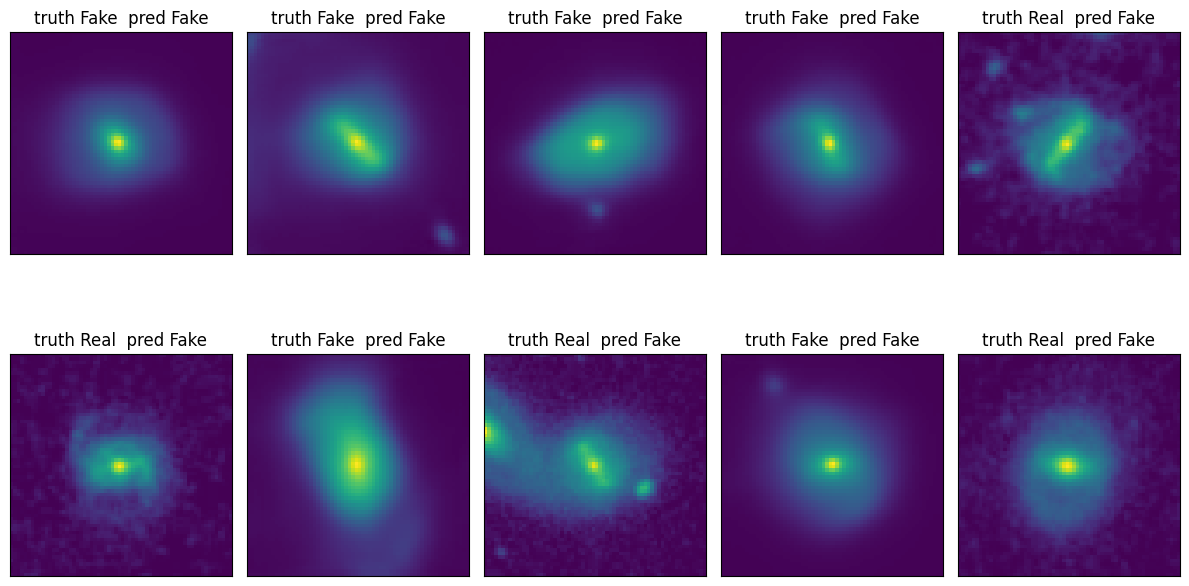

In [ ]:
f, ax = plt.subplots(2,5, figsize=(12,10))
ax = ax.flatten()

for images, labels in val_ds.take(1):
  for i in range(10):
    #ax = plt.subplot(3, 3, i + 1)
    ax[i].imshow(images[i].numpy().astype("float32"))
    ax[i].set_title(f'truth {class_names[labels[i]]}  pred {class_names[y_pred_label[i]]}')
    #plt.axis("off")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    f.tight_layout()
plt.show() 